In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans


In [0]:
dataset = pd.read_csv('Wholesale customers data.csv')
x = dataset.iloc[:, [2, 3, 4, 5, 6, 7]].values

In [0]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [0]:
y_kmeans

array([3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 0, 3, 2, 2, 2, 3, 0, 3, 2, 3, 2, 3,
       2, 0, 2, 2, 3, 3, 0, 1, 2, 3, 2, 2, 3, 3, 2, 0, 0, 1, 2, 2, 0, 0,
       3, 0, 0, 4, 3, 0, 3, 3, 1, 0, 2, 3, 0, 0, 3, 3, 3, 4, 3, 0, 3, 4,
       3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 0, 3, 3, 3, 0, 3, 2, 3, 4, 4, 1,
       3, 2, 3, 3, 0, 2, 0, 3, 3, 3, 3, 3, 0, 0, 3, 1, 3, 2, 0, 0, 3, 0,
       3, 0, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 2, 2, 3, 1, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 3, 2, 0, 3, 3, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 2, 3, 0, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       1, 3, 3, 3, 3, 1, 0, 1, 3, 3, 3, 3, 0, 0, 2, 3, 3, 0, 3, 2, 2, 3,
       3, 3, 0, 0, 2, 3, 3, 0, 3, 3, 3, 0, 2, 4, 3, 3, 0, 0, 0, 2, 0, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 1, 2, 2,
       2, 3, 3, 0, 3, 3, 2, 3, 3, 0, 3, 2, 3, 2, 3, 3, 1, 1, 3, 3, 2, 3,
       0, 0, 0, 2, 0, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 2, 1, 1,
       3, 2, 2, 1, 3, 3, 3, 0, 2, 3, 2, 3, 3, 3, 2,

In [0]:
kmeans_cc = kmeans.cluster_centers_
kmeans_cc

array([[ 4991.48148148, 12140.54320988, 18505.50617284,  1591.11111111,
         8148.24691358,  1822.40740741],
       [49899.54545455,  6995.        ,  6558.77272727,  9887.18181818,
          984.59090909,  4681.95454545],
       [21627.85576923,  3903.26923077,  5119.35576923,  4194.54807692,
         1123.04807692,  1713.21153846],
       [ 6143.87168142,  3276.7920354 ,  4115.16371681,  2438.34955752,
         1220.70353982,   992.53982301],
       [20031.28571429, 38084.        , 56126.14285714,  2564.57142857,
        27644.57142857,  2548.14285714]])

In [0]:
import collections
print(collections.Counter(y_kmeans))

Counter({3: 226, 2: 104, 0: 81, 1: 22, 4: 7})


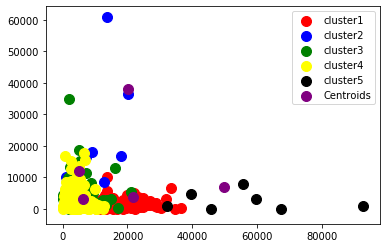

In [0]:
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'red', label = 'cluster1')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'cluster2')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'cluster3')
plt.scatter(x[y_kmeans == 3, 2], x[y_kmeans == 3, 3], s = 100, c = 'yellow', label = 'cluster4')
plt.scatter(x[y_kmeans == 4, 2], x[y_kmeans == 4, 3], s = 100, c = 'black', label = 'cluster5')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'purple', label = 'Centroids')

plt.legend()

In [0]:
kmeans.inertia_

53019062599.730865

In [0]:
distortions = []
K = range(2,20)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(x)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

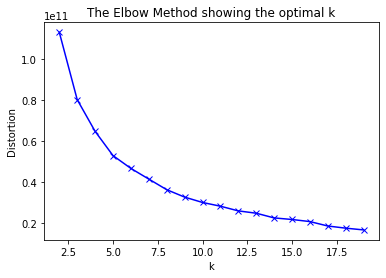

In [0]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
from sklearn.metrics.pairwise import pairwise_distances_argmin, euclidean_distances
k_means_labels = pairwise_distances_argmin(x, kmeans_cc)

In [0]:
for i,j in enumerate(set(k_means_labels)):
    positions=x[np.where(k_means_labels == i)]
    output=sum(euclidean_distances(positions,kmeans_cc[j].reshape(1,-1)))
    print('cluster {} has a  heterogeneity of {}'.format(i,output))

cluster 0 has a  heterogeneity of [820541.64742024]
cluster 1 has a  heterogeneity of [441236.78586903]
cluster 2 has a  heterogeneity of [853366.20410306]
cluster 3 has a  heterogeneity of [1417128.52551596]
cluster 4 has a  heterogeneity of [219460.01364546]


**Lab_12**

In [0]:
 from scipy.cluster import hierarchy
 import matplotlib.pyplot as plt

In [0]:
from sklearn.preprocessing import normalize
data_scaled = normalize(x)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2,3,4,5
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


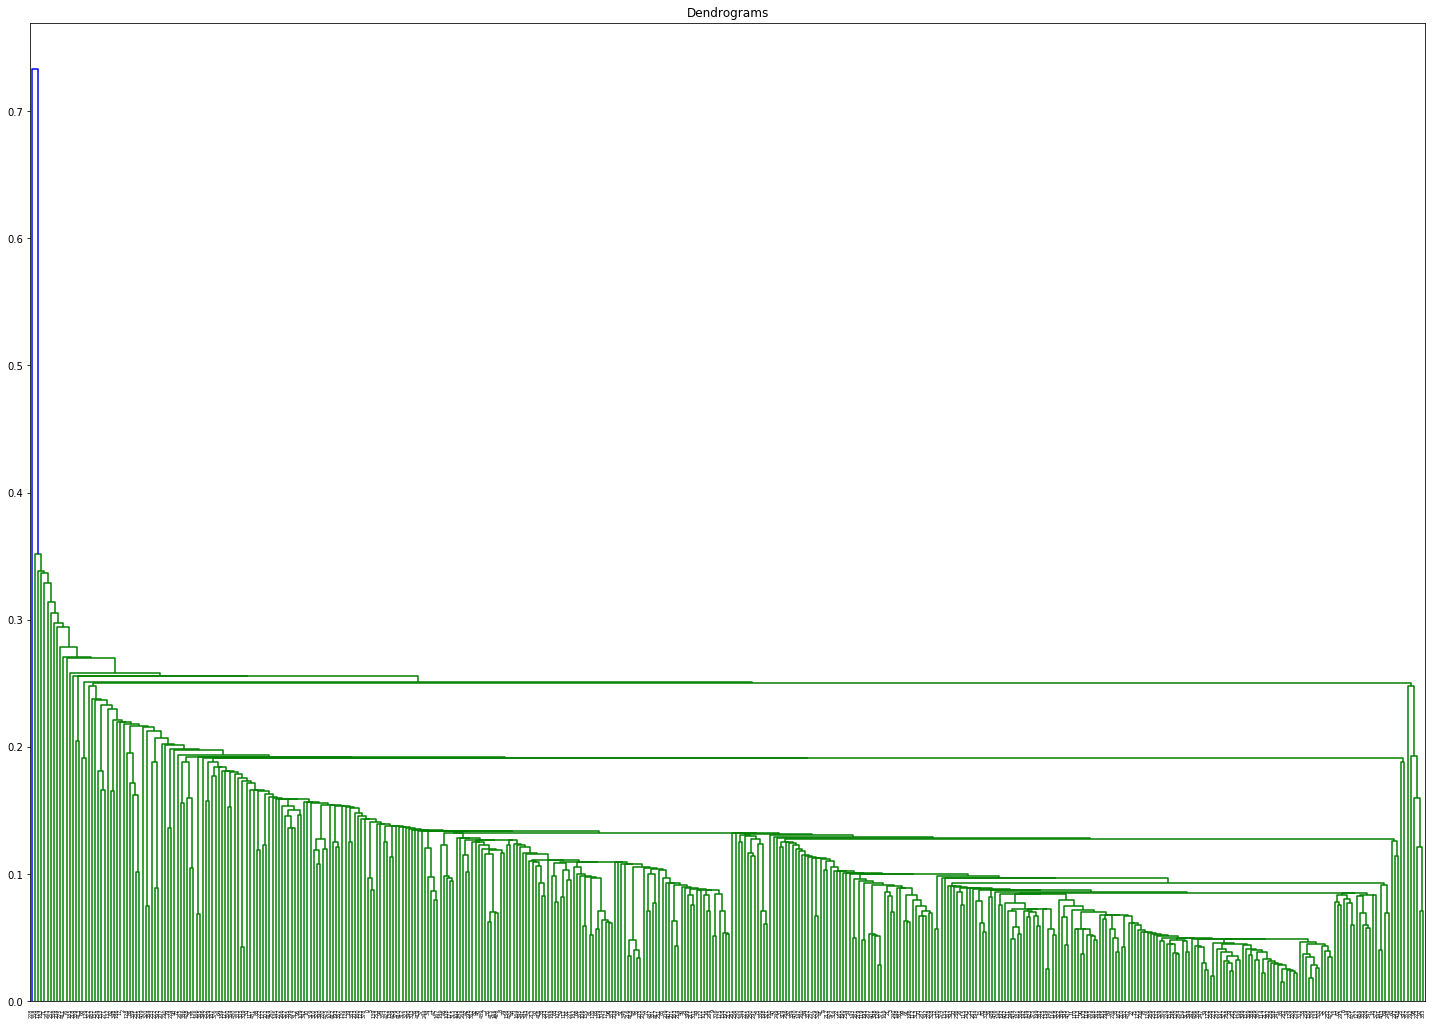

In [0]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(25, 18))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='single'))

In [0]:
#Suitable number of clusters are 2

In [0]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
y_pred = cluster.fit_predict(data_scaled)

In [0]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

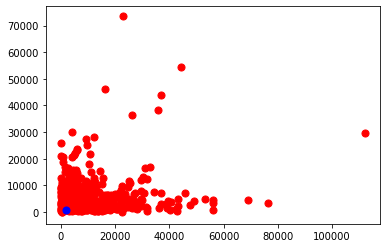

In [0]:
plt.scatter(x[y_pred==0, 0], x[y_pred==0, 1], s=50, marker='o', color='red')
plt.scatter(x[y_pred==1, 0], x[y_pred==1, 1], s=50, marker='o', color='blue')
plt.show()

In [0]:
from sklearn.metrics.pairwise import pairwise_distances_argmin, euclidean_distances
cluster_labels = pairwise_distances_argmin(x, kmeans_cc)

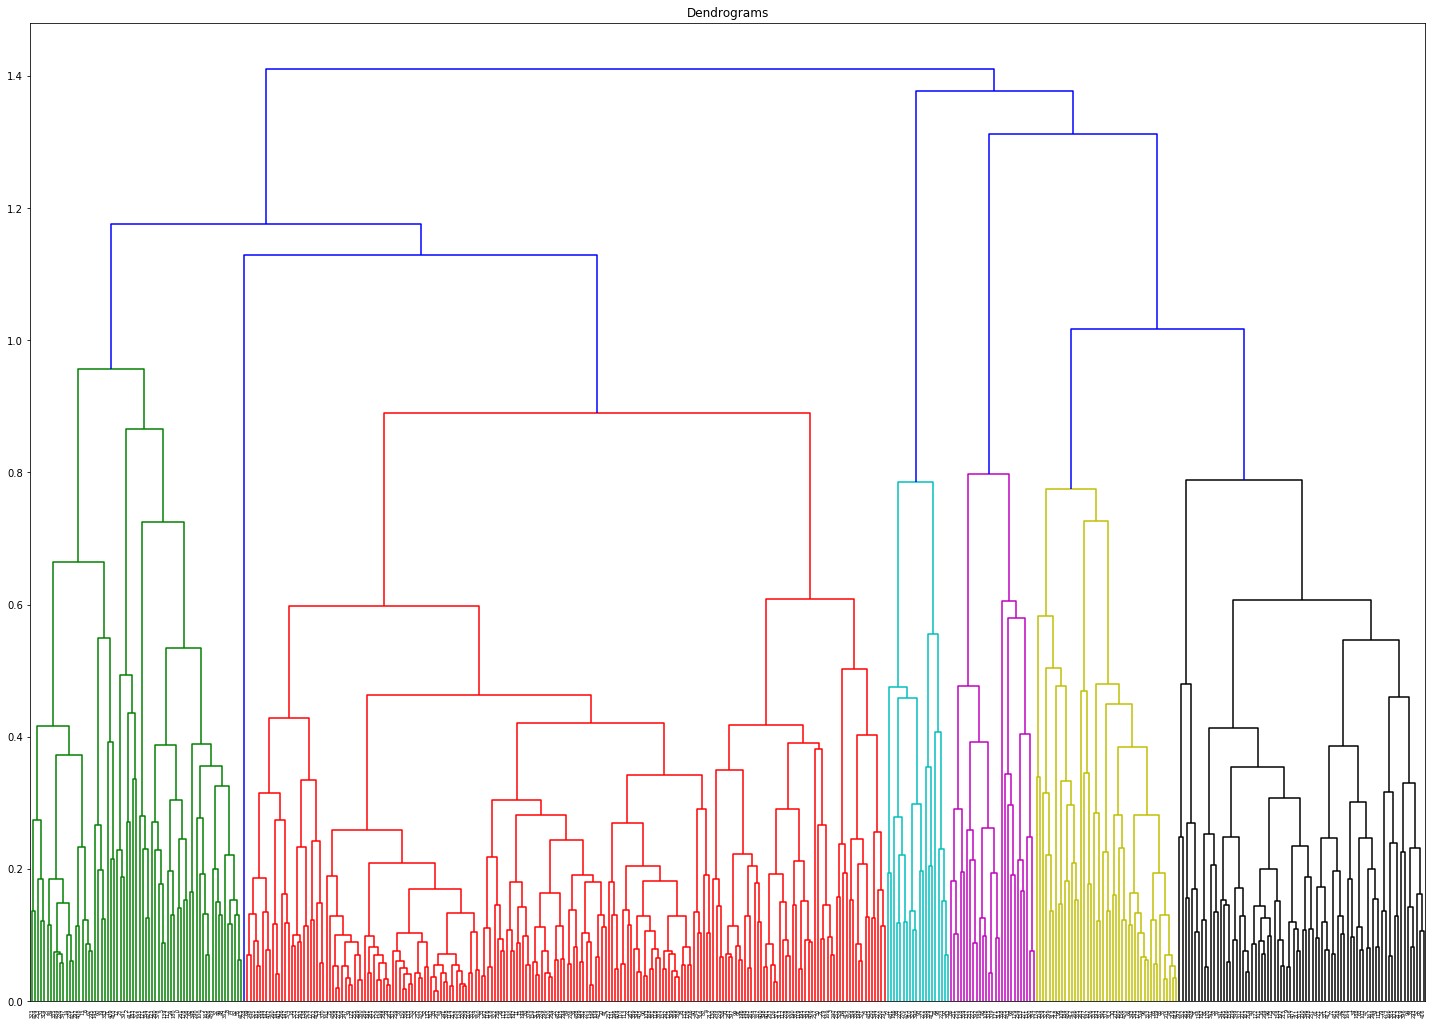

In [0]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(25, 18))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete'))

In [0]:
#Suitable number of clusters are 6

In [0]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')  
y_pred = cluster.fit_predict(data_scaled)

In [0]:
y_pred

array([1, 0, 1, 4, 4, 1, 1, 1, 1, 0, 0, 4, 4, 1, 1, 4, 0, 1, 4, 1, 4, 4,
       4, 1, 1, 1, 4, 4, 0, 4, 1, 0, 4, 4, 0, 0, 4, 1, 0, 4, 4, 4, 0, 0,
       1, 3, 0, 0, 1, 0, 4, 0, 4, 0, 4, 1, 0, 0, 4, 0, 1, 0, 1, 0, 4, 0,
       0, 1, 3, 4, 4, 1, 2, 4, 1, 4, 2, 0, 4, 0, 4, 0, 1, 4, 1, 0, 3, 4,
       2, 4, 4, 4, 0, 2, 0, 0, 0, 2, 2, 4, 1, 0, 0, 4, 4, 4, 0, 0, 3, 0,
       4, 0, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 0, 3, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 3, 4, 3,
       4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 1, 0, 0, 4, 4, 0, 3, 0, 0, 0, 0,
       4, 4, 1, 3, 1, 4, 0, 1, 0, 1, 2, 0, 0, 3, 4, 4, 4, 0, 4, 4, 4, 0,
       4, 4, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 4,
       4, 0, 2, 2, 4, 4, 1, 4, 5, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 1, 3, 4, 1, 4, 4, 4, 4, 4, 4, 0,
       0, 0, 0, 4, 0, 4, 2, 3, 3, 4, 0, 3, 4, 2, 4, 1, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 4, 0, 0, 4, 1, 4, 1, 0, 0, 4,

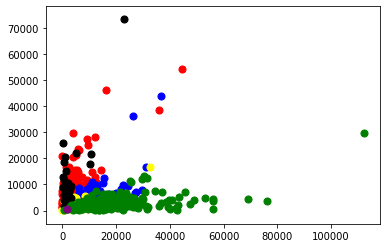

In [0]:
plt.scatter(x[y_pred==0, 0], x[y_pred==0, 1], s=50, marker='o', color='red')
plt.scatter(x[y_pred==1, 0], x[y_pred==1, 1], s=50, marker='o', color='blue')
plt.scatter(x[y_pred==2, 0], x[y_pred==2, 1], s=50, marker='o', color='yellow')
plt.scatter(x[y_pred==3, 0], x[y_pred==3, 1], s=50, marker='o', color='black')
plt.scatter(x[y_pred==4, 0], x[y_pred==4, 1], s=50, marker='o', color='green')
plt.scatter(x[y_pred==5, 0], x[y_pred==5, 1], s=50, marker='o', color='purple')
plt.show()

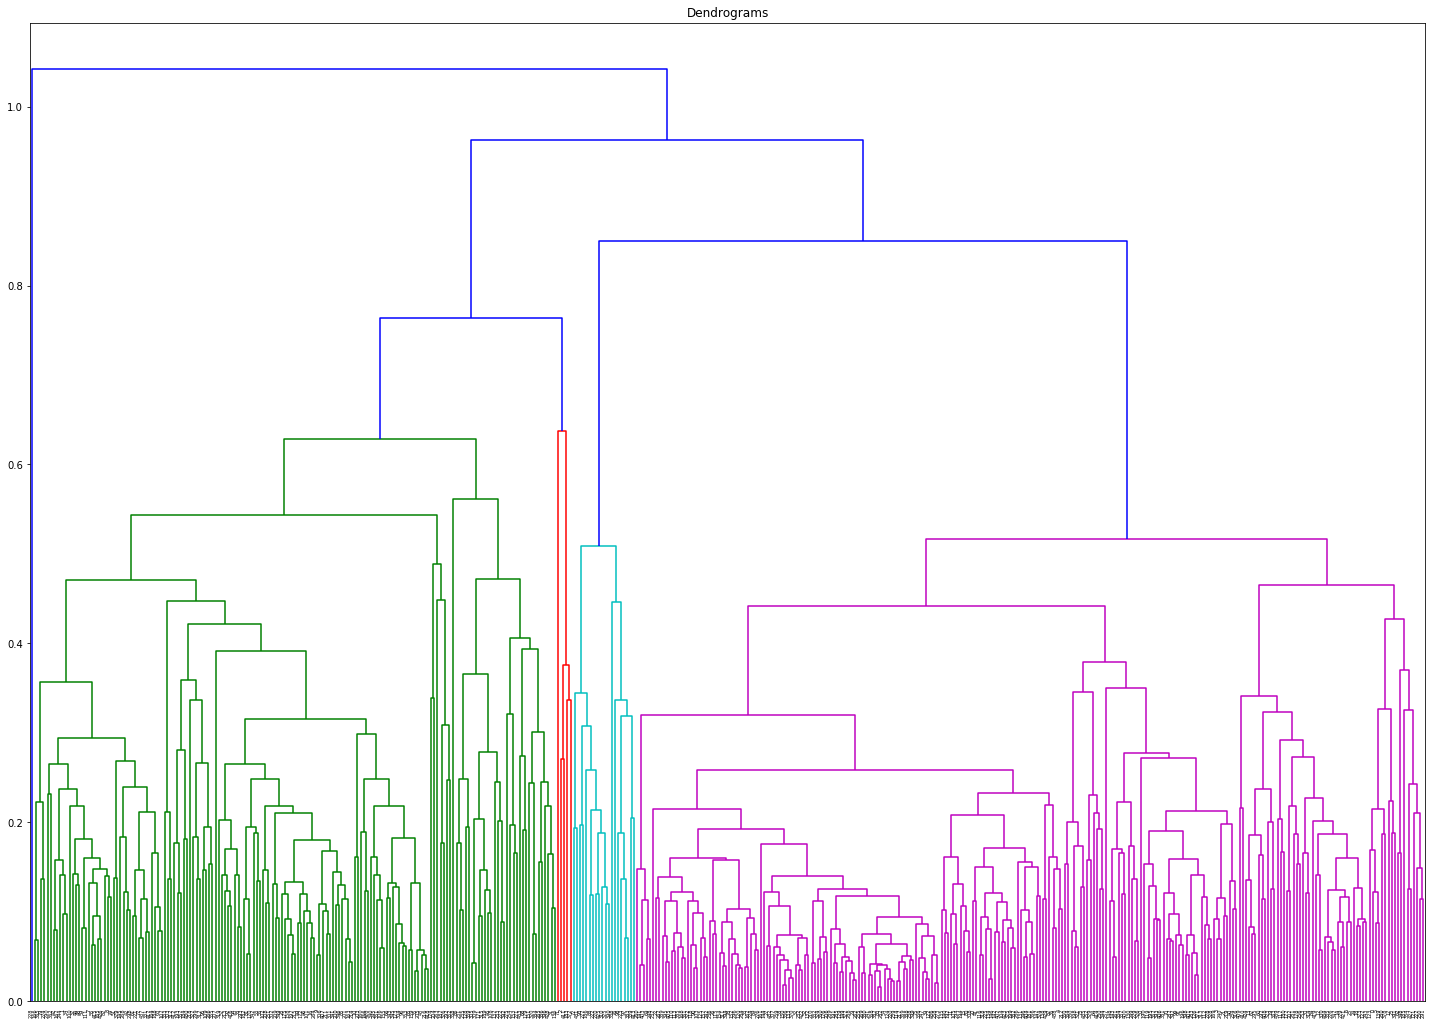

In [0]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(25, 18))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='average'))

In [0]:
#Suitable number of clusters are 6

In [0]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')  
y_pred = cluster.fit_predict(data_scaled)

In [0]:
y_pred

array([2, 0, 4, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 5, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       1, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 0, 4, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 1, 1, 2, 2, 2, 2, 3, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2,

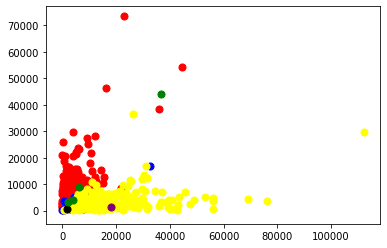

In [0]:
plt.scatter(x[y_pred==0, 0], x[y_pred==0, 1], s=50, marker='o', color='red')
plt.scatter(x[y_pred==1, 0], x[y_pred==1, 1], s=50, marker='o', color='blue')
plt.scatter(x[y_pred==2, 0], x[y_pred==2, 1], s=50, marker='o', color='yellow')
plt.scatter(x[y_pred==3, 0], x[y_pred==3, 1], s=50, marker='o', color='black')
plt.scatter(x[y_pred==4, 0], x[y_pred==4, 1], s=50, marker='o', color='green')
plt.scatter(x[y_pred==5, 0], x[y_pred==5, 1], s=50, marker='o', color='purple')
plt.show()